<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-DAF/blob/main/CrossVall_MLP_DAF_ultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')


(1480, 13348)
(256, 10993)
(362, 3000)
(40, 3000)
(61, 21494)
(6, 27408)


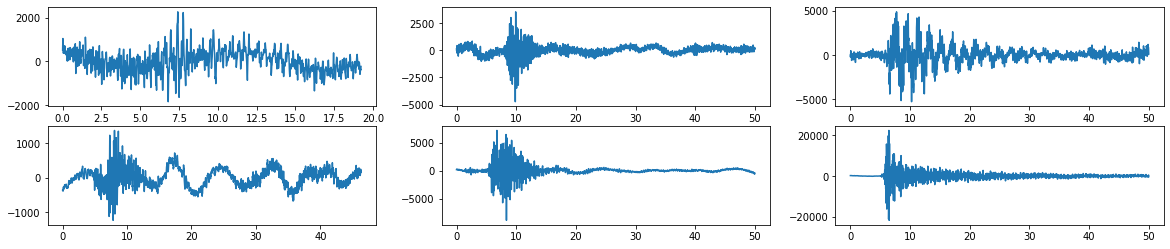

In [ ]:
# Creando función para retirar el offset de los datos en DataFrame
def mean_norma(df_input):
        return df_input.apply(lambda x: (x-x.mean()), axis=1)  

df_mean_test_1 = mean_norma(df_test_1)  # Señales VT
df_mean_train_1 = mean_norma(df_train_1)
df_mean_test_2 = mean_norma(df_test_2)  # Señales LP
df_mean_train_2 = mean_norma(df_train_2)
df_mean_test_3 = mean_norma(df_test_3)  # Señales Tor
df_mean_train_3 = mean_norma(df_train_3)

print(df_mean_train_1.shape)
print(df_mean_test_1.shape)
print(df_mean_train_2.shape)
print(df_mean_test_2.shape)
print(df_mean_train_3.shape)
print(df_mean_test_3.shape)

# Convirtiendo el dataframe en array
d_train_1 = df_mean_train_1.values
d_train_1 = d_train_1[:, 0:3000]
d_test_1 = df_mean_test_1.values
d_test_1 = d_test_1[:, 0:3000]

d_train_2 = df_mean_train_2.values
d_train_2 = d_train_2[:, 0:3000]
d_test_2 = df_mean_test_2.values
d_test_2 = d_test_2[:, 0:6000]

d_train_3 = df_mean_train_3.values
d_train_3 = d_train_3[:, 0:3000]
d_test_3 = df_mean_test_3.values
d_test_3 = d_test_3[:, 0:3000]

# Dibujando la señal orioginal
n = 3000
fs = 50 # frecuencia de muestreo
t = np.linspace(0,fs,n)
plt.figure(1, figsize=(20, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

In [ ]:
print(d_train_1.shape, d_train_2.shape, d_train_3.shape)

(1480, 3000) (362, 3000) (61, 3000)


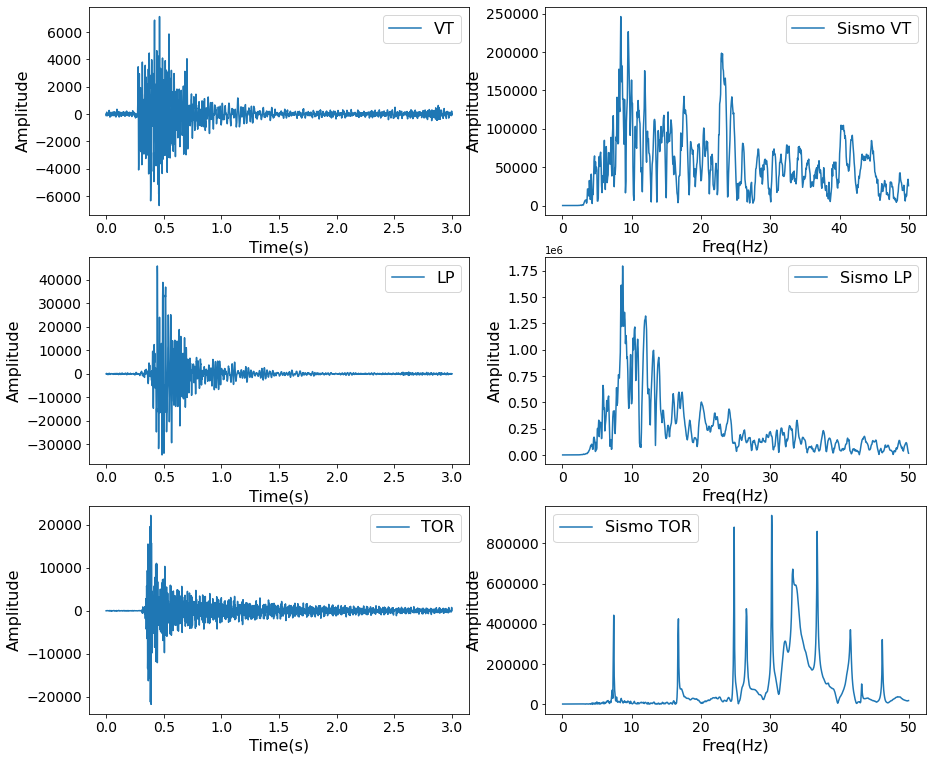

In [ ]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte
fc = 2
fs = 100
t = np.linspace(0, 3, 3000)
# Orden del filtro
order = 5

# Coeficientes del filtro Butterworth
b, a = butter(order, fc / (fs/2), btype='highpass')

# Filtrando la señal VT
x1_filt = filtfilt(b, a, d_train_1[104])
X1 = np.fft.fft(x1_filt)
# Filtrando la señal LP
x2_filt = filtfilt(b, a, d_test_2[8])
X2 = np.fft.fft(x2_filt)
# Filtrando la señal TOR
x3_filt = filtfilt(b, a, d_test_3[4])
X3 = np.fft.fft(x3_filt)

freq = np.fft.fftfreq(len(d_train_1), 1/fs) 
pos_mask = np.where(freq > 0)
freq_pos = freq[pos_mask]

fig, ax = plt.subplots(figsize=(15, 13))

plt.subplot(321)
plt.plot(t, x1_filt, linewidth=1.5)
plt.legend(labels=["VT"], fontsize = 16)
plt.xlabel('Time(s)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(322)
X1 = X1[pos_mask]
plt.plot(freq_pos, np.abs(X1), linewidth=1.5)
plt.legend(labels=["Sismo VT"], fontsize = 16)
plt.xlabel('Freq(Hz)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(323)
plt.plot(t, x2_filt, linewidth=1.5)
plt.legend(labels=["LP"], fontsize = 16)
plt.xlabel('Time(s)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(324)
X2 = X2[pos_mask]
plt.plot(freq_pos, np.abs(X2), linewidth=1.5)
plt.legend(labels=["Sismo LP"], fontsize = 16)
plt.xlabel('Freq(Hz)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(325)
plt.plot(t, x3_filt, linewidth=1.5)
plt.legend(labels=["TOR"], fontsize = 16)
plt.xlabel('Time(s)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(326)
X3 = X3[pos_mask]
plt.plot(freq_pos, np.abs(X3), linewidth=1.5)
plt.legend(labels=["Sismo TOR"], fontsize = 16)
plt.xlabel('Freq(Hz)', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.savefig('sismogramas&espectros.pdf', dpi=400, format='pdf')

Text(0, 0.5, 'Amplitude')

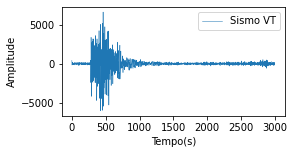

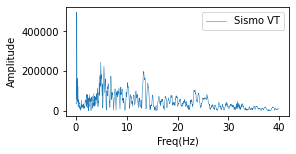

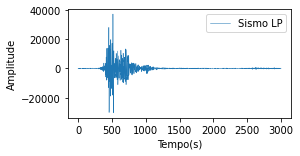

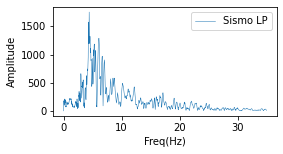

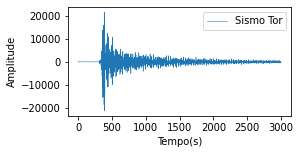

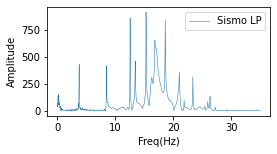

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import signal 
from scipy.signal import butter, filtfilt
from scipy.fft import fft, ifft, fftfreq
import math


N = 2048
# sample spacing
T = 1.0 / 80
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = fftfreq(N, T)[:N//2]

filtro = signal.butter(4, 3, 'hp', fs=50, output='sos')
filtered = signal.sosfilt(filtro, d_train_1[104])
fft_signal = fft(d_train_1[104])

plt.figure(1, figsize=(4, 2))
plt.plot(filtered, linewidth=0.5)
plt.legend(labels=["Sismo VT"])
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.figure(2, figsize=(4, 2))
plt.plot(xf, np.abs(fft_signal[0:N//2]), linewidth=0.5)
plt.legend(labels=["Sismo VT"])
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude')


T = 1.0 / 70.0
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = fftfreq(N, T)[:N//2]
sos = signal.butter(14, 3, 'hp', fs=50, output='sos')
filtered = signal.sosfilt(sos, d_test_2[8])
fft_signal = fft(d_test_2[8])

plt.figure(3, figsize=(4, 2))
plt.plot(filtered, linewidth=0.5)
plt.legend(labels=["Sismo LP"])
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.figure(4, figsize=(4, 2))
plt.plot(xf, 2.0/N * np.abs(fft_signal[0:N//2]), linewidth=0.5)
plt.legend(labels=["Sismo LP"])
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude')

T = 1.0 / 70.0
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = fftfreq(N, T)[:N//2]
sos = signal.butter(13, 2, 'hp', fs=100, output='sos')
filtered = signal.sosfilt(sos, d_test_3[4])
fft_signal = fft(d_test_3[4])


plt.figure(5, figsize=(4,2))
plt.plot(filtered, linewidth=0.5)
plt.legend(labels=["Sismo Tor"])
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.figure(6, figsize=(4,2))
plt.plot(xf, 2.0/N * np.abs(fft_signal[0:N//2]), linewidth=0.5)
plt.legend(labels=["Sismo LP"])
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude')

(1480, 3000)
(256, 3000)
(362, 3000)
(40, 3000)
(61, 3000)
(6, 3000)


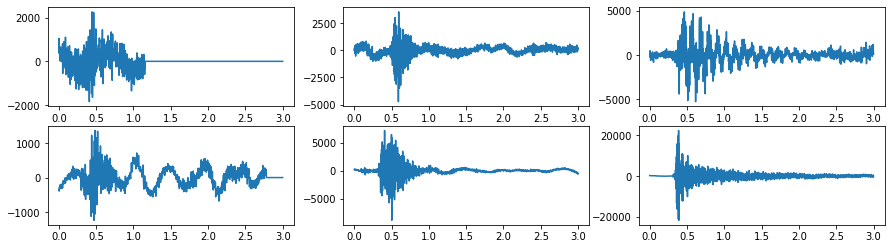

In [ ]:
# Quitando los valores NaN de los array numpy

# Señales VT
d_train_1[np.isnan(d_train_1)] = 0.0
d_test_1[np.isnan(d_test_1)] = 0.0
print(d_train_1.shape)
print(d_test_1.shape)

# Señales LP
d_train_2[np.isnan(d_train_2)] = 0.0
d_test_2[np.isnan(d_test_2)] = 0.0
print(d_train_2.shape)
print(d_test_2.shape)

# Señales Tor`
d_train_3[np.isnan(d_train_3)] = 0.0
d_test_3[np.isnan(d_test_3)] = 0.0
print(d_train_3.shape)
print(d_test_3.shape)

# Graficando
plt.figure(2, figsize=(15, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

# Normalización

Mínimo y máximo originales: -2710525.5, 2436521.9
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -151379.3, 151082.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -35374.3, 38363.7
Mínimo y máximo normalizado: 0.0, 1.0


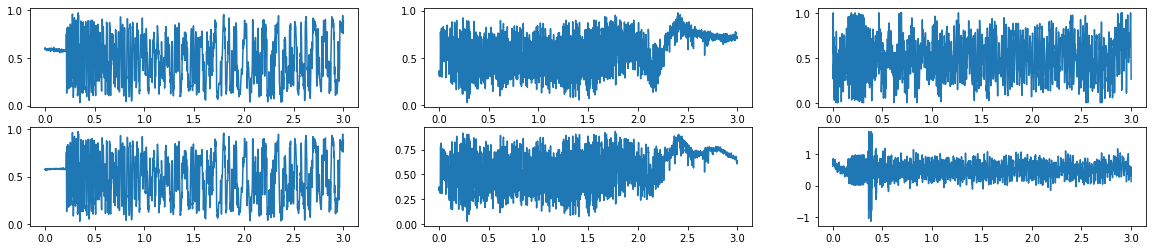

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
D_train_s1 = min_max_scaler.fit_transform(d_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_1), np.max(d_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s1), np.max(D_train_s1))) 
D_test_s1 = min_max_scaler.transform(d_test_1)  

# Señales LP
D_train_s2 = min_max_scaler.fit_transform(d_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_2), np.max(d_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
D_test_s2 = min_max_scaler.transform(d_test_2)  

# Señales Tor
D_train_s3 = min_max_scaler.fit_transform(d_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_3), np.max(d_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
D_test_s3 = min_max_scaler.transform(d_test_3)  

# Graficando
plt.figure(3, figsize=(20, 4))
plt.subplot(231)
plt.plot(t, D_train_s1[60])
plt.subplot(232)
plt.plot(t, D_train_s2[18])
plt.subplot(233) 
plt.plot(t, D_train_s3[38])
plt.subplot(234)
plt.plot(t, D_test_s1[44])
plt.subplot(235)
plt.plot(t, D_test_s2[34])
plt.subplot(236)
plt.plot(t, D_test_s3[4])

# **D A F** 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print('version de TensorFlow:' + tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
version de TensorFlow:2.11.0


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

# **DAF para el dataset de sismos (VT, LP y Tor)**

In [ ]:
'''
Juntamos todas las señales
'''
X1 = np.concatenate((D_train_s1, D_train_s2,D_train_s3), axis=0)
X2 = np.concatenate((D_test_s1, D_test_s2,D_test_s3), axis=0)

print(X1.shape, X2.shape)

(1903, 3000) (302, 3000)


**Autoencoder I sigmoide**

In [ ]:
np.random.seed(23)

dim_entrada = X1.shape[1]      
entrada_sig = Input(shape=(dim_entrada,))
print(X1.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(entrada_sig)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
encoded_sig = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu')(encoded_sig)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu')(x)
x = Dropout(0.25)(x)
decoded_sig = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)

autoencoder1_sig.summary()

3000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              6002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 1000)              8

**Autoencoder I tanh**

In [ ]:
np.random.seed(23)

dim_entrada = X1.shape[1]      
entrada_tan = Input(shape=(dim_entrada,))
print(X1.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(entrada_tan)
x = Dropout(0.2)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.2)(x)
encoded_tan = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu')(encoded_tan)
x = Dropout(0.2)(x)
x = Dense(2000, activation='relu')(x)
x = Dropout(0.2)(x)
decoded_tan = Dense(3000, activation='tanh')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)

autoencoder1_tan.summary()

3000
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_7 (Dense)             (None, 1000)             

In [ ]:
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder1_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_tan.fit(X1, X1,    
                           epochs=10,
                           batch_size=150,
                           validation_data=(X2, X2),    
                           shuffle=True)

Epoch 1/10
13/13 [==============================] - 6s 38ms/step - loss: 7.7571 - accuracy: 5.2549e-04 - val_loss: 3.5124 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 17ms/step - loss: 1.9602 - accuracy: 0.0394 - val_loss: 0.7085 - val_accuracy: 0.0033
Epoch 3/10
13/13 [==============================] - 0s 14ms/step - loss: 0.4136 - accuracy: 0.1682 - val_loss: 0.1841 - val_accuracy: 0.8245
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.1647 - accuracy: 0.4141 - val_loss: 0.1160 - val_accuracy: 0.8245
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.1198 - accuracy: 0.6647 - val_loss: 0.0869 - val_accuracy: 0.8245
Epoch 6/10
13/13 [==============================] - 0s 15ms/step - loss: 0.0945 - accuracy: 0.7378 - val_loss: 0.0792 - val_accuracy: 0.8245
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0706 - accuracy: 0.7436 - val_loss: 0.0493 - val_accuracy: 0.8278
Epoch

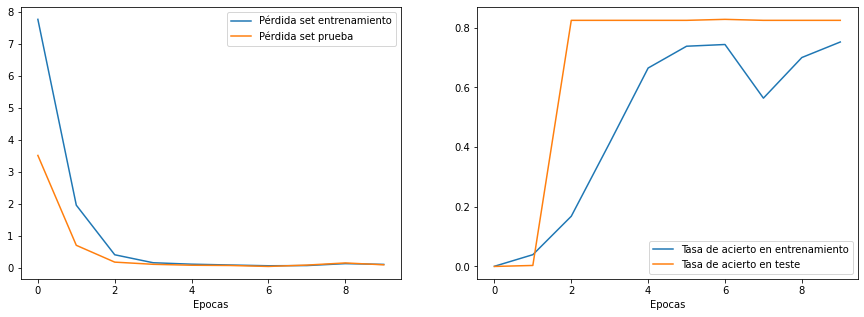

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder1_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_sig.fit(X1, X1,    
                           epochs=10,
                           batch_size=150,
                           validation_data=(X2, X2),    
                           shuffle=True)

Epoch 1/10
13/13 [==============================] - 2s 32ms/step - loss: 7.4894 - accuracy: 0.0021 - val_loss: 3.3839 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 16ms/step - loss: 1.8224 - accuracy: 0.0730 - val_loss: 0.6359 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 16ms/step - loss: 0.3182 - accuracy: 0.4840 - val_loss: 0.1223 - val_accuracy: 0.8245
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0986 - accuracy: 0.7520 - val_loss: 0.0648 - val_accuracy: 0.8278
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0638 - accuracy: 0.7740 - val_loss: 0.0689 - val_accuracy: 0.8609
Epoch 6/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0438 - accuracy: 0.8003 - val_loss: 0.0547 - val_accuracy: 0.8609
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8182 - val_loss: 0.0499 - val_accuracy: 0.8609
Epoch

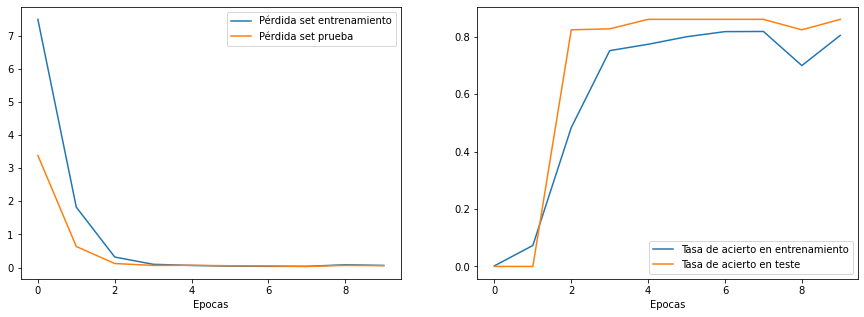

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_1sig = bottleneck.predict(X2)
rep_train_1sig = bottleneck.predict(X1)
print(rep_test_1sig.shape)
print(rep_train_1sig.shape)

60/60 [==============================] - 0s 2ms/step
(302, 800)
(1903, 800)


In [ ]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_1tan = bottleneck.predict(X2)
rep_train_1tan = bottleneck.predict(X1)
print(rep_test_1tan.shape)
print(rep_train_1tan.shape)

60/60 [==============================] - 0s 1ms/step
(302, 800)
(1903, 800)


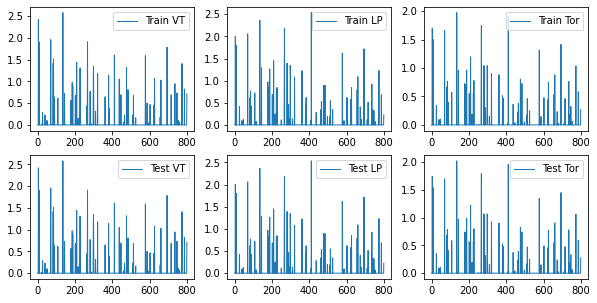

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1tan[600], linewidth=1)
plt.legend(labels=["Train VT"])
plt.subplot(2,3,4)
plt.plot(rep_test_1tan[200], linewidth=1)
plt.legend(labels=["Test VT"])
plt.subplot(2,3,2)
plt.plot(rep_train_1tan[1500], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,5)
plt.plot(rep_test_1tan[280], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1tan[1900], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')
plt.subplot(2,3,6)
plt.plot(rep_test_1tan[300], linewidth=1)
plt.legend(labels=["Test Tor"])

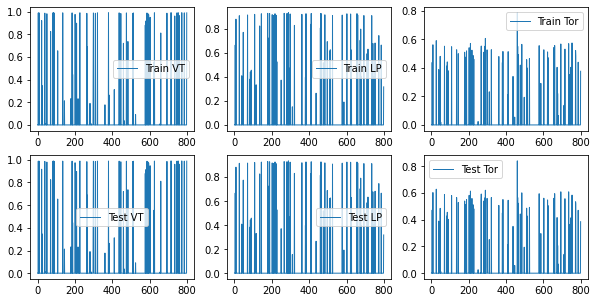

In [ ]:
Tanh_train_s = min_max_scaler.fit_transform(rep_train_1tan)
Tanh_test_s = min_max_scaler.transform(rep_test_1tan)  

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(Tanh_train_s[600], linewidth=1)
plt.legend(labels=["Train VT"])
plt.subplot(2,3,4)
plt.plot(Tanh_test_s[200], linewidth=1)
plt.legend(labels=["Test VT"])
plt.subplot(2,3,2)
plt.plot(Tanh_train_s[1500], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,5)
plt.plot(Tanh_test_s[280], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,3)
plt.plot(Tanh_train_s[1900], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')
plt.subplot(2,3,6)
plt.plot(Tanh_test_s[300], linewidth=1)
plt.legend(labels=["Test Tor"])

**Autoencoder II sigmoid**

In [ ]:
np.random.seed(23)

dim_entrada = rep_train_1sig.shape[1]      
entrada_s = Input(shape=(dim_entrada,))
print(rep_train_1sig.shape[1])             

# Encoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.005))(entrada_s)
x = Dropout(0.05)(x)
encoded_s = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu')(encoded_s)
x = Dropout(0.05)(x)
decoded_s = Dense(800, activation='sigmoid')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2sig= Model(inputs=entrada_s, outputs=decoded_s)

autoencoder1_2sig.summary()

800
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 400)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               

In [ ]:
autoencoder1_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder1_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2sig.fit(rep_train_1sig, rep_train_1sig,    
                           epochs=10,
                           batch_size=100,
                           validation_data=(rep_test_1sig, rep_test_1sig),    
                           shuffle=True)

Epoch 1/10
20/20 [==============================] - 3s 18ms/step - loss: 2.0733 - accuracy: 0.0021 - val_loss: 1.1002 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.7281 - accuracy: 0.6542 - val_loss: 0.3855 - val_accuracy: 0.8477
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.3689 - val_loss: 0.1305 - val_accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0880 - accuracy: 0.0068 - val_loss: 0.0512 - val_accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0412 - accuracy: 0.0074 - val_loss: 0.0309 - val_accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0287 - accuracy: 0.0053 - val_loss: 0.0249 - val_accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0247 - accuracy: 0.0095 - val_loss: 0.0224 - val_accuracy: 0.000

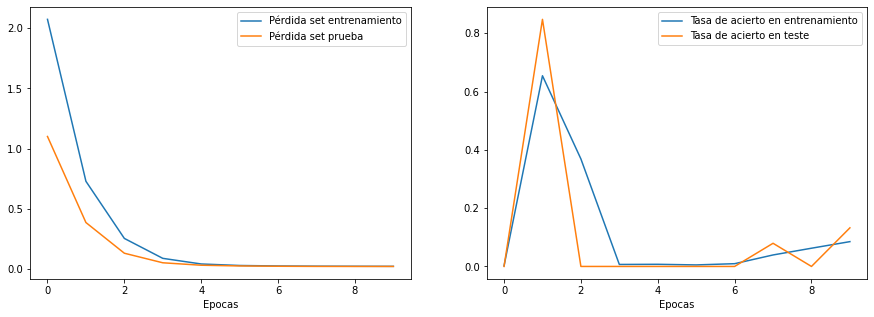

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_1s = bottleneck.predict(rep_test_1sig)
rep_train_1s = bottleneck.predict(rep_train_1sig)
print(rep_test_1s.shape)
print(rep_train_1s.shape)

60/60 [==============================] - 0s 3ms/step
(302, 200)
(1903, 200)


**Autoencoder II tanh**

In [ ]:
np.random.seed(23)

dim_entrada = rep_train_1tan.shape[1]      
entrada_t = Input(shape=(dim_entrada,))
print(rep_train_1tan.shape[1])             

# Encoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.001))(entrada_t)
x = Dropout(0.05)(x)
encoded_t = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu', kernel_regularizer=l2(0.005))(encoded_t)
x = Dropout(0.05)(x)
decoded_t = Dense(800, activation='tanh')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)

autoencoder1_2tan.summary()

800
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_13 (Dense)            (None, 400)               320400    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_14 (Dense)            (None, 400)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 800)               

In [ ]:
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder1_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2tan.fit(rep_train_1tan, rep_train_1tan,    
                           epochs=25,
                           batch_size=100,
                           validation_data=(rep_test_1tan, rep_test_1tan),    
                           shuffle=True)

Epoch 1/25
20/20 [==============================] - 2s 13ms/step - loss: 1.4702 - accuracy: 0.0778 - val_loss: 0.9827 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 0s 6ms/step - loss: 0.7215 - accuracy: 0.0000e+00 - val_loss: 0.4725 - val_accuracy: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 0s 7ms/step - loss: 0.3483 - accuracy: 0.0000e+00 - val_loss: 0.2329 - val_accuracy: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 0s 6ms/step - loss: 0.1777 - accuracy: 0.0000e+00 - val_loss: 0.1262 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 0s 6ms/step - loss: 0.1021 - accuracy: 0.0000e+00 - val_loss: 0.0783 - val_accuracy: 0.0000e+00
Epoch 6/25
20/20 [==============================] - 0s 6ms/step - loss: 0.0678 - accuracy: 0.0000e+00 - val_loss: 0.0555 - val_accuracy: 0.0000e+00
Epoch 7/25
20/20 [==============================] - 0s 6ms/step - loss: 0.0487 - accuracy: 0.0000e+00 - val_loss: 0

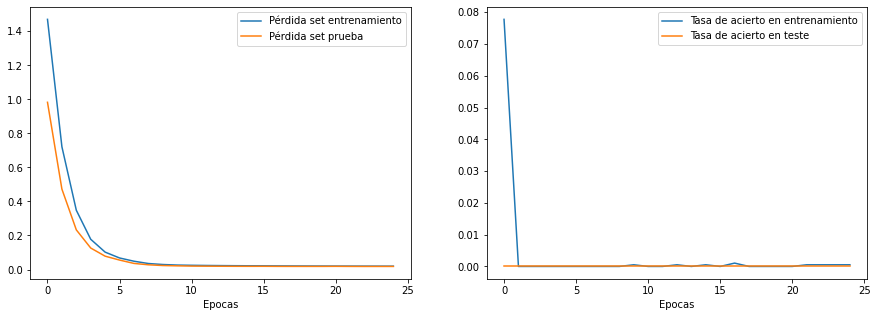

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_1t = bottleneck.predict(rep_test_1tan) #rep_test_1tan
rep_train_1t = bottleneck.predict(rep_train_1tan) #
print(rep_test_1t.shape)
print(rep_train_1t.shape)

60/60 [==============================] - 0s 1ms/step
(302, 200)
(1903, 200)


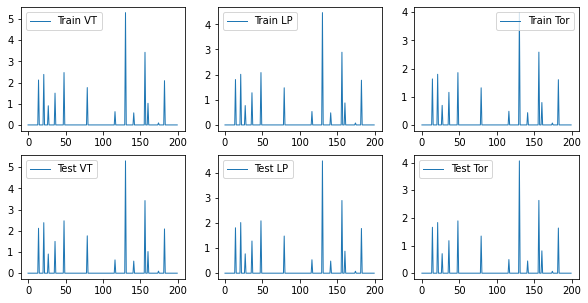

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1t[600], linewidth=1)
plt.legend(labels=["Train VT"])
plt.subplot(2,3,4)
plt.plot(rep_test_1t[200], linewidth=1)
plt.legend(labels=["Test VT"])
plt.subplot(2,3,2)
plt.plot(rep_train_1t[1500], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,5)
plt.plot(rep_test_1t[280], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1t[1900], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')
plt.subplot(2,3,6)
plt.plot(rep_test_1t[300], linewidth=1)
plt.legend(labels=["Test Tor"])

**Representaciones DAF**

In [ ]:
rep_train_1 = np.concatenate([rep_train_1s,rep_train_1t], axis=1) 
rep_test_1 = np.concatenate([rep_test_1s,rep_test_1t], axis=1) 
print(rep_test_1.shape)
print(rep_train_1.shape)

(302, 400)
(1903, 400)


# Representaciones de menor Dimensión

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta una representación por cada tipo de señal solo para poder identificar las diferntes representaciones obtenidas.

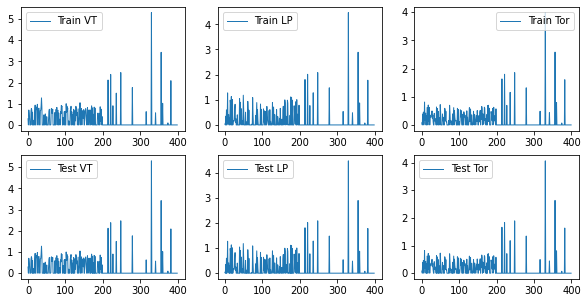

In [ ]:
# Observamos cómo el Autoencoder consigue representar 

# Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1[600], linewidth=1)
plt.legend(labels=["Train VT"])
plt.subplot(2,3,4)
plt.plot(rep_test_1[200], linewidth=1)
plt.legend(labels=["Test VT"])
plt.subplot(2,3,2)
plt.plot(rep_train_1[1500], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,5)
plt.plot(rep_test_1[280], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1[1900], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')
plt.subplot(2,3,6)
plt.plot(rep_test_1[300], linewidth=1)
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

Preparando los datos para ser presentados en el clasificador

**Normalización de las representaciones**

Mínimo y máximo originales: 0.0, 5.3
Mínimo y máximo normalizado: 0.0, 1.0
400


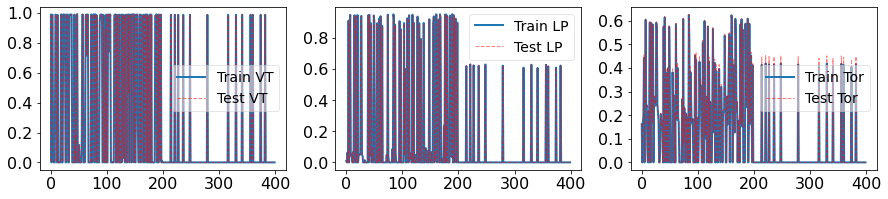

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
Rep_train_s1 = min_max_scaler.fit_transform(rep_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_1), np.max(rep_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(Rep_train_s1), np.max(Rep_train_s1))) 
Rep_test_s1 = min_max_scaler.transform(rep_test_1)  


# Graficando
n3 = Rep_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))

#fig, axs = plt.subplots(2, 2, figsize=(15, 15))

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.plot(Rep_train_s1[600], lw=2, label="Train VT")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(132)
plt.plot(Rep_train_s1[1500], lw=2, label="Train LP")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(133) 
plt.plot(Rep_train_s1[1900], lw=2, label="Train Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)



plt.subplot(131)
plt.plot(Rep_test_s1[200], 'r--', alpha=0.5, lw=1, label="Test VT")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)

plt.subplot(132)
plt.plot(Rep_test_s1[280], 'r--', alpha=0.5, lw=1, label="Test LP")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)

plt.subplot(133)
plt.plot(Rep_test_s1[300], 'r--', alpha=0.5, lw=1, label="Test Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)


plt.savefig('caracter_DAF2.pdf', dpi=400, format='pdf')

A continuación se crea el set X con el total de los datos de sismos, y el set Y con el vector de etiqueta correspondiente para cada sismo según su clase: 100 para clase 1, 010 para la clase 2 y 001 para la clase 3.

(2205, 403)
[1. 0. 0.] [1. 0. 0.] [0. 1. 0.] [0. 1. 0.] [0. 0. 1.] [0. 0. 1.]
(2205, 400) (2205, 3)


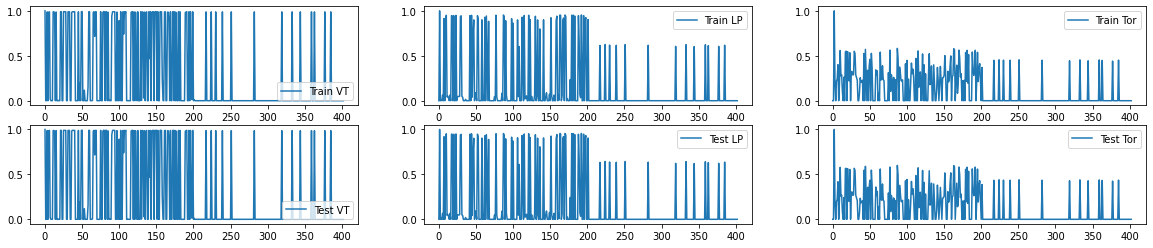

In [ ]:
# a continuación son adicionadas tres columnas que me permitirán ser usadas de etiquetas para los tipos de sismos
D_train_s1 = Rep_train_s1[0:1480,:]
D_train_s2 = Rep_train_s1[1480:1842,:]
D_train_s3 = Rep_train_s1[1842:1903,:]
D_test_s1 = Rep_test_s1[0:256,:]
D_test_s2 = Rep_test_s1[256:296,:]
D_test_s3 = Rep_test_s1[296:302,:]

D_train_s1 = np.insert(D_train_s1, [0], (1,0,0), axis=1)
D_test_s1 = np.insert(D_test_s1, [0], (1,0,0), axis=1)
D_train_s2 = np.insert(D_train_s2, [0], (0,1,0), axis=1)
D_test_s2 = np.insert(D_test_s2, [0], (0,1,0), axis=1)
D_train_s3 = np.insert(D_train_s3, [0], (0,0,1), axis=1)
D_test_s3 = np.insert(D_test_s3, [0], (0,0,1), axis=1)

# Creo mi set de entrenamiento con sismos y sus etiquetas correspondientes y lo mismo para mi set de prueba
set_X = np.concatenate([D_train_s1,D_test_s1, D_train_s2, D_test_s2, D_train_s3, D_test_s3], axis=0) 
print(set_X.shape)
plt.figure(figsize=(20, 4))
plt.subplot(231)
plt.plot(set_X[1479])
plt.legend(labels=["Train VT"])
plt.subplot(232)
plt.plot(set_X[1736])
plt.legend(labels=["Train LP"])
plt.subplot(233) 
plt.plot(set_X[2138])
plt.legend(labels=["Train Tor"])
plt.subplot(234)
plt.plot(set_X[1735])
plt.legend(labels=["Test VT"])
plt.subplot(235)
plt.plot(set_X[2137])
plt.legend(labels=["Test LP"])
plt.subplot(236)
plt.plot(set_X[2200])
plt.legend(labels=["Test Tor"])

print(set_X[1470,0:3],set_X[1730,0:3],set_X[1780,0:3],set_X[2000,0:3],set_X[2140,0:3],set_X[2200,0:3])

y, X = set_X[:,0:3], np.delete(set_X, range(0, 3), axis=1)
print(X.shape, y.shape)

In [ ]:
print(X.shape)
print(y.shape)

(2205, 400)
(2205, 3)


# *Clasificador MLP*

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [ ]:
#np.random.seed(23)

dim_entrada = X.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

400
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense_16 (Dense)            (None, 500)               200500    
                                                                 
 dropout_12 (Dropout)        (None, 500)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               50100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 3)                 303       
                                                                 
Total params: 250,903
Trainable params: 250,903
Non-tr

A cntinuación se crea una forma diferente de indicar las tres clases de sismos en el vector y_label (será necesario en la estratificación cruzada):

In [ ]:
y_label = []
for i in range(len(y)):
  if y[i,0] > 0:
    y_label.append(0)
  if y[i,1] > 0:
    y_label.append(1)
  if y[i,2] > 0:
    y_label.append(2)
y_label = np.array(y_label)
print(y_label.shape)

(2205,)


# Implementando Validación Cruzada Estratificada y Clasificación

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

Definimos la configuracipon de Validacipon Cruzada estratificada y luego el modelo de clasificación:

In [ ]:
cv = StratifiedShuffleSplit(n_splits=6, random_state=True)

clasificador = Model(inputs=entrada, outputs=saida)

# Aplicando la curva ROC:

# Aplicando CV Estratrificado en la clasificación 

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [ 948 1475  320 ...  182   16  422] TEST: [ 595 1942 1514  196 1425  317  933 1120  252 1300  170  648 1689  327
 1337  155 1095  586 2002 1356 1878 1414 1360 1034 2184 1961 1873 1681
  316  278  999 2017 1595 1150 1255  871 1971 1111 1845  416  901 1538
  485 1417 2047  243  633  849  210 2121   96 1326 1655   25 1202 1372
  960 1803 1049 2013  630  141  715  564 1088 1858  489  319 1762 1312
  751 1405 2174  152 1050 1772  847  865 1031 2120 1601  580  914 1217
  615 1791 1894 1607 1277  279 1303 1001  144 2202 1674 1967 2045 2061
 1478 1805  431  129 1061 1164  269 1099 1039 1730  695 1516 2124 1980
  508 1495  668 1214 2087 1736 1928 1916 1864  896  889  357 1673 1490
 1096  405 1393  905  468 1067 1321 1569  627  469 2108  235 1345 1110
 2030 1442  728 1362 2198 1558 1731  562 1500  753  398  626 1988 2038
  706  263 1612 1380 1566  749  130 1585 1239  149  313  532  829  928


TRAIN: [ 986 1354  416 ...  833  801  700] TEST: [ 827  443  390  777  581  618 2075  679 1705  887   36  737 1933  999
  209  320 1954 1645 1037 2110 2003  731  657 1367 1561 1758  593  211
 1858 1593  229  321 1423 1214 1097  901   32  379 1906 1089 1340  854
 1695  491  105 1080   78  757  994 1174  804 1746  471  403 1106 1759
 1127  815   61 2068 1829  422 1900  246 1788 1293 2016 1164 1908 1894
 1133 1146 2021  191 1589 1398  587 2204  851 1510  334 1529 1220 1581
  659  944 2198  599 2007  622 2013  823 1585 1847 1298 1675 1374 1384
 1486  270 1669  361 1563  620   84  120  227  284   76  256  266 1673
  509 1120 1817 1861  902 1938 1190 2168 2196  703 1766 2155  465  118
 2165 1042 1126 1124 1160  197 1469 1353 1055 1020  393 1158 1030   53
 1963  577   13  898 1517  488 1761 1335  759  194  960 2002 1413 1682
  133 1390 1721 1269 1462 2106  661  358 1977 1980 1863 1274 1406  974
 2093  396  226 1397  187  506 1286 1229 1539 1666 1054 1121  223  635
 1094  893 1798  972 1143 10

TRAIN: [ 887   29  217 ... 1826 1067 1078] TEST: [2007  833  444 1448 1714  235 1392  379 1804  791 1809 1646 2152 1493
  605  737 1889 1155 1798  276 1801  117  163 1576  671 1693 1132  623
  741  311 1582  103 1140 2012 1348  211 1725 1921 1007  934 1277 1823
  951 2172 2128  386 1643 1480 1753 1578  284   24 1294 1722  885  267
 1698 2112 1726 1775  385 1077  584  151 1151 1979  162 2032  907 1343
  251 1163 2174 1957 1515 1850 1833 1899 1021 1380 1161 1039  202 2092
  404  903 1321  842  865 1570 1402   75  879 1367  716 1729   85 1063
  760 1248 1943  502 1717 2093 1046 1608 1568 1695  277 1807 1625  732
 2054  540  258  167 1610  208 2039  327  613  668 2181  869 1633  608
 1246  285  770  293 1347  571  572 1342 2198  579 2081 1238 1396  930
  965  614 1214  335 1683 1510 1296 1776  734  744 2036   91 1577  701
 1037 1871 2074 1930 1200  535 1196 1642  935 1624  632 1225  861  197
 1299 2020 2166   57  322  416 1418 1863 1232  157 1661 1259 1973  989
  221 1626 1914  558  244 19

TRAIN: [1124  160 1375 ... 1215  439 1397] TEST: [1590 1924  389  436  157   33  615 2154 1960  433 1636   54  210 2053
  207 1335  605  602 1860  484  707  907 1880  351  303   17   72 1248
 2174 1309  486 1433 1287 1443 1948  826  164  608 1422  943 1887 1714
 1675 1104 1257 1540 1260  723 1530  267 1666 1396 1562 1620  755 1953
  423 1202  297 1300  362 1891 1662 1470 2132 1566 1884 1809 1822 1670
 1163 2168 1403 1184  283 2033 1770 1083  785 1671  600 1506 1140 1745
  367   65  774  410  614 1876 1678 1129 1862  282 1765  909  790 1328
 1402  104 1285  866 1087 1774  523 1189 1788  105  253  271 1935  641
  867  402  719  101  280  577  463 2047 1055 2196 1602  904   81 1710
 1173  618 1348  284 1469  685 2073 1003 1302 2169 1349 2096  845  676
 1984  933  876 1431  881 1442 1323  575   31 1674  140 1955 1369  159
  921 1031  919 1903  957  139  908  555  751  426  988 1388 1691  992
 1488  112 1644 1687  801 2085 1945  611  542 1621 1589  574 1306  802
 1082  975 1669 1084 1737 21

TRAIN: [ 780 1363 1965 ...  584 1244  994] TEST: [  11 1129  252 1280  443  844  781 2165  501   19  700 1973 1388 1967
 1766  591 1915 1854 1303 1437  590 2150 1448   28 1945  462  785 1989
 1763 2199 1566  596 1339 1384  167   92 1882  111 1587  858 1563 1764
  823  877  604 1163 1227 1015 1910  953  961 1593  835  185  630 1062
  509  555 1845  779  747  447 1841  947 2192  291 1063 1257 1510  373
 1149 1019 2180  278 1390  898  986 1891  104  168  258 2119 1577  217
 2009 1771 1613 1113  379  973 1175 1767  601 1441    6  158  740  608
  481  704 2099 1872  351  297  114  945  491 2063 1507  786 1271  811
 1863  906 1312 1202  992  641  929 1626  224 1485  393 1827  996 1373
 1935  797 1181 2176 1055 1560 1043 1713  648 2098  313  387 1842 2067
  997  803 2121  819 2111   37 1376  432 2123  311  878  515  895 1281
  778  181 1828  674 1737 2074  214  154 1109 1025  751 1779 1367  290
 1738 1506  892  441 1135 1137  820 1581  952  642 1788  340  897 1469
 1792 1963  298  233  415  1

TRAIN: [ 324 1805 2146 ... 1846  861 1972] TEST: [ 510  654 2151 1609  296  763  135  840  845  476  959  127 2035  997
 1564 1228  209  968 2130 1819 1530  464  332 1945  177 1013  725 1883
 1799    2 1837  374 1287 1264 2092  417  661 1726 1874 1161 1132  854
  637  756 1842 2204  401  870 2006   40   23 2095   12  509  484  952
 1506 1450 1836  262   85 1202  925 1197  786 2122 1084   45  439 1322
  571 1195 1292  594 1935 1369  468 1359  947 1014  217  541  122 1618
 2072 1762  585 1296 2082 1626 1358  100  233 2178  283 1225 1016  490
 1737  420  113  720 1568 1253   87  555  147  319  353 1494   38 2148
 2200 1206 1623 1599 1073 1822  128  717   67 1232  250   97 2064 1639
 1500 1723  361 1236 1990  779 1182  173 1425 1763  589 1221  731 1562
 2198 1211 1294 1021  749  775  102 1907  740  876 2088 1820 1978 2075
 1252 1848 1652  739  886 1575  922  690  386 1691 1241 1156   79 1956
 1917 1744 1497 1372 1051  256  965 1939  337  564  814 1940 1095 1184
  479 1424  933 1461 1382  8

train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]


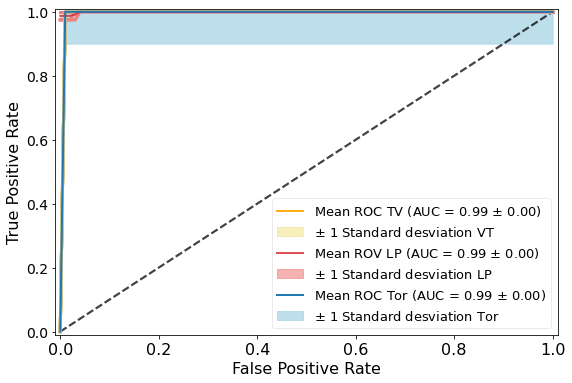

<Figure size 432x432 with 0 Axes>

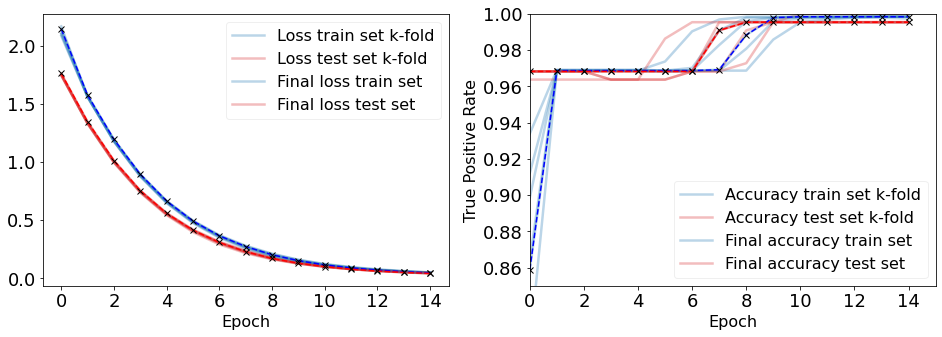

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle



print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(1, figsize=(9,6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []
fold = 1

for train_index, test_index in cv.split(X, y_label):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  dim_entrada = X.shape[1]      
  entrada = Input(shape=(dim_entrada,))
  x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
  x = Dropout(0.25)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.25)(x)
  saida = Dense(3, activation='softmax')(x)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['categorical_accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

  print("ENTRENAMIENTO EN EL FOLD %0.2F" %(fold))  
  y_pred = clasificador.predict(X_test)

  tprs = []
  Corte = []

  base_fpr = np.linspace(0,1,101)
  mean_fpr = np.linspace(0,1,100)

  
  # Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0], y_pred[:, 0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0]) # Es auc1, o deberia ser auc0???????? no importa porque luego forma un vector para cada tipo de sismo
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
          alpha=0.2)
  
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = 'orange',
      lw = 3,
      alpha = 0.9
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)

  
  # Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1], y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[-1] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightcoral",
      lw = 3,
      alpha = 0.99
  )
  tprs_mean_1.append(mean_tpr)

  
  # Curva ROC para la clase Tor

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2], y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:,2])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightblue",
      lw = 3,
      alpha = 0.99
  )

  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right", fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_loss"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_categorical_accuracy"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  
  fold = fold + 1


for train, test in cv.split(X, y_label):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y_label[train]), np.bincount(y_label[test])))

plt.figure(3, figsize = (6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final + std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color = "orange",
    label = "Mean ROC TV (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_0, std_auc_0),
    lw = 2,
    alpha = 0.9
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color = "khaki",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis =0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color = "tab:red",
    label = "Mean ROV LP (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_1, std_auc_1),
    lw = 2,
    alpha = 0.8
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color = "lightcoral",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation LP"
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final -std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color = "tab:blue",
    label = "Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_2, std_auc_2),
    lw = 2,
    alpha = 0.99
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color = "lightblue",
    alpha = 0.8,
    label = "$\pm$ 1 Standard desviation Tor"
)

ax.legend(loc="lower right", fontsize = 13, fancybox=True, framealpha=0.4)
ax.figure.savefig('ROC_DAF.pdf', dpi=400, format='pdf')

plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5) 
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold", 
                   "Loss test set k-fold",
                   "Final loss train set", 
                   "Final loss test set"], 
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5) 
plt.xlim(0, 15)
plt.ylim(0.85, 1.0)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold", 
                   "Accuracy test set k-fold",
                   "Final accuracy train set", 
                   "Final accuracy test set"], 
           fontsize='16', fancybox=True, framealpha=0.3, loc='lower right') 
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_DAF.pdf', dpi=400, format='pdf')

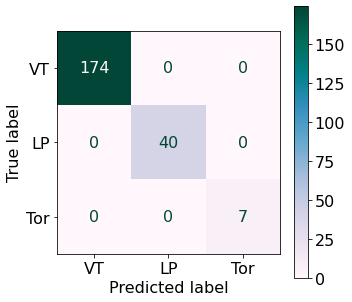

[[[ 47   0]
  [  0 174]]

 [[181   0]
  [  0  40]]

 [[214   0]
  [  0   7]]]
matriz VT  [[ 47   0]
 [  0 174]]
matriz LP  [[181   0]
 [  0  40]]
matriz Tor  [[214   0]
 [  0   7]]


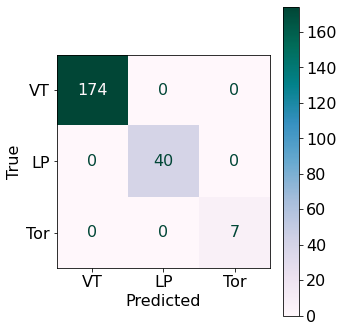

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor') 


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.pdf', dpi=400, format='pdf')


plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)

# **Métricas de Evaluación de Desempeño**

In [ ]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[1,0]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[0,1]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[0,1]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1

In [ ]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')
# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')
# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')
# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 100.0%
Especificidad LP: 100.0%
Especificidad Tor: 100.0%
Sensitividad VT: 100.0%
Sensitividad LP: 100.0%
Sensitividad Tor: 100.0%
Precisión VT: 100.0%
Precisión LP: 100.0%
Precisión Tor: 100.0%
f1 score VT: 100.0%
f1 score LP: 100.0%
f1 score Tor: 100.0%


In [ ]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      1.00      1.00       174
          LP       1.00      1.00      1.00        40
         Tor       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221
 samples avg       1.00      1.00      1.00       221

